# Driving Visual Analysis with Automobile Data

### Importing automobile fuel efficiency data into R

In [60]:
#install & load package
ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg)) 
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}
packages <- c("plyr","ggplot2","reshape2","dplyr")
ipak(packages)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



plyr  ggplot2 reshape2    dplyr 
    TRUE     TRUE     TRUE     TRUE

In [4]:
#set working directory
setwd("/home/jingan/Dropbox/Github/Pratical_Data_Science/driving_visual_analysis_with_automobile_data")

In [34]:
fileUrl <- "http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip"
download.file(fileUrl, destfile = "vehicles.csv.zip")

In [62]:
#load data
vehicles <- read.csv(unz("vehicles.csv.zip", "vehicles.csv"),stringsAsFactors = F)

In [37]:
labels <- do.call(rbind, strsplit(readLines("varlabels.txt")," - "))

In [38]:
head(labels)

atvtype,type of alternative fuel or advanced technology vehicle
barrels08,annual petroleum consumption in barrels for fuelType1 (1)
barrelsA08,annual petroleum consumption in barrels for fuelType2 (1)
charge120,time to charge an electric vehicle in hours at 120 V
charge240,time to charge an electric vehicle in hours at 240 V
city08,"city MPG for fuelType1 (2), (11)"


### Exploring and describing fuel efficiency data

In [47]:
dim(vehicles)

[1] 38162    83

In [48]:
names(vehicles)

[1] "barrels08"       "barrelsA08"      "charge120"       "charge240"      
 [5] "city08"          "city08U"         "cityA08"         "cityA08U"       
 [9] "cityCD"          "cityE"           "cityUF"          "co2"            
[13] "co2A"            "co2TailpipeAGpm" "co2TailpipeGpm"  "comb08"         
[17] "comb08U"         "combA08"         "combA08U"        "combE"          
[21] "combinedCD"      "combinedUF"      "cylinders"       "displ"          
[25] "drive"           "engId"           "eng_dscr"        "feScore"        
[29] "fuelCost08"      "fuelCostA08"     "fuelType"        "fuelType1"      
[33] "ghgScore"        "ghgScoreA"       "highway08"       "highway08U"     
[37] "highwayA08"      "highwayA08U"     "highwayCD"       "highwayE"       
[41] "highwayUF"       "hlv"             "hpv"             "id"             
[45] "lv2"             "lv4"             "make"            "model"          
[49] "mpgData"         "phevBlended"     "pv2"             "pv4"            
[53] "range"           "rangeCity"       "rangeCityA"      "rangeHwy"       
[57] "rangeHwyA"       "trany"           "UCity"           "UCityA"         
[61] "UHighway"        "UHighwayA"       "VClass"          "year"           
[65] "youSaveSpend"    "guzzler"         "trans_dscr"      "tCharger"       
[69] "sCharger"        "atvType"         "fuelType2"       "rangeA"         
[73] "evMotor"         "mfrCode"         "c240Dscr"        "charge240b"     
[77] "c240bDscr"       "createdOn"       "modifiedOn"      "startStop"      
[81] "phevCity"        "phevHwy"         "phevComb"

In [56]:
#unique years of data 
sort(unique(vehicles$year))
length(unique(vehicles$year))

[1] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
[16] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
[31] 2014 2015 2016 2017 2018

[1] 35

In [57]:
first_year <- min(vehicles$year)
last_year <- max(vehicles$year)

In [59]:
table(vehicles$fuelType1)


           Diesel       Electricity Midgrade Gasoline       Natural Gas 
             1016               138                77                60 
 Premium Gasoline  Regular Gasoline 
            10328             26543 

In [74]:
vehicles$trany[vehicles$trany == ""] <- NA

In [75]:
table(vehicles$trany)


                    Auto (AV-S6)                     Auto (AV-S8) 
                               1                                1 
                       Auto (AV)                      Auto(AM-S6) 
                               2                               87 
                     Auto(AM-S7)                      Auto(AM-S8) 
                             266                                6 
                     Auto(AM-S9)                        Auto(AM5) 
                               1                               12 
                       Auto(AM6)                        Auto(AM7) 
                             114                              165 
                       Auto(AM8)                      Auto(AV-S6) 
                               5                              153 
                     Auto(AV-S7)                      Auto(AV-S8) 
                              78                               28 
                        Auto(L3)                         Auto

In [80]:
#transfer transmission
vehicles$trany2 <- ifelse(substr(vehicles$trany, 1, 4) ==
                            "Auto", "Auto", "Manual")

In [84]:
vehicles$trany <- as.factor(vehicles$trany)
table(vehicles$trany2)


  Auto Manual 
 25718  12433 

In [85]:
with(vehicles, table(sCharger, year))

        year
sCharger 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
         1964 1701 1210 1247 1130 1149 1074 1130 1116 1088  979  962  767  757
       S    0    0    0    0    0    4    4    2    5    5    3    5    6    5
        year
sCharger 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
          800  840  826  891  949 1015 1089 1136 1067 1098 1152 1159 1082 1096
       S   12   12   14   20   26   29   33   30   37   28   35   19   18   25
        year
sCharger 2012 2013 2014 2015 2016 2017 2018
         1114 1127 1138 1210 1189 1195   20
       S   28   42   65   60   61   62    0

In [86]:
with(vehicles, table(sCharger))

sCharger
          S 
37467   695 

### Analyzing automobile fuel efficiency over time

In [88]:
mpgByYr <- ddply(vehicles, ~year, summarise, avgMPG = 
                 mean(comb08), avgHghy = mean(highway08), 
                 avgCity = mean(city08))

In [89]:
head(mpgByYr)

year,avgMPG,avgHghy,avgCity
1984,19.88187,23.07536,17.98269
1985,19.80835,23.04233,17.87831
1986,19.55041,22.69917,17.66529
1987,19.22855,22.44507,17.31034
1988,19.32832,22.70265,17.33363
1989,19.12576,22.46574,17.14397


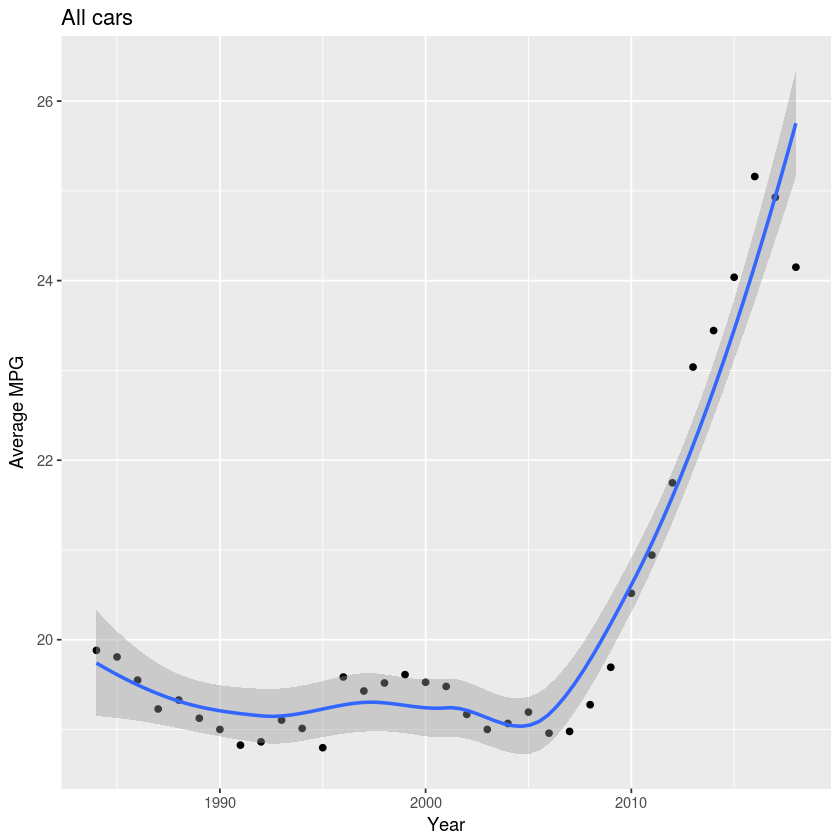

In [91]:
ggplot(mpgByYr, aes(year, avgMPG)) + geom_point() +
  geom_smooth(method = "loess") + xlab("Year") + 
  ylab("Average MPG") +
  ggtitle("All cars")

In [92]:
table(vehicles$fuelType1)


           Diesel       Electricity Midgrade Gasoline       Natural Gas 
             1016               138                77                60 
 Premium Gasoline  Regular Gasoline 
            10328             26543 

In [93]:
gasCars <- subset(vehicles, fuelType1 %in% c("Regular
   Gasoline", "Premium Gasoline", "Midgrade Gasoline") &
                    fuelType2 == "" & atvType != "Hybrid")
# gasCars <- filter(vehicles, fuelType1 %in% c("Regular
#   Gasoline", "Premium Gasoline", "Midgrade Gasoline") &
#                    fuelType2 == "" & atvType != "Hybrid")

In [99]:
mpgByYr_Gas <- ddply(gasCars, ~year, summarise, avgMPG =
                       mean(comb08))

In [95]:
gas <- filter(vehicles, fuelType1 %in% c("Regular
   Gasoline", "Premium Gasoline", "Midgrade Gasoline") &
                    fuelType2 == "" & atvType != "Hybrid")

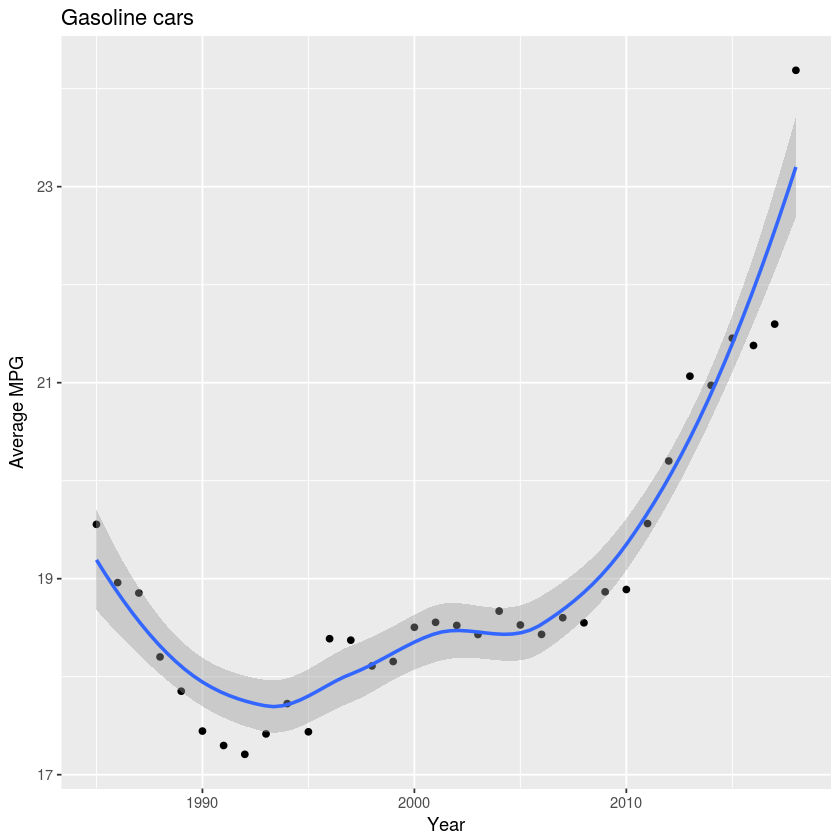

In [101]:
ggplot(mpgByYr_Gas, aes(year, avgMPG)) + geom_point() +
  geom_smooth(method = 'loess') + xlab("Year") + ylab("Average MPG") +
  ggtitle("Gasoline cars")

This scatter plot of the data offers the convincing evidence that there is a negative, or even inverse correlation, between engine displacement and fuel efficiency; thus, smaller cars tend to be more fuel-efficient.

In [98]:
table(vehicles$atvType)
table(vehicles$fuelType2)
table(vehicles$atvType, vehicles$fuelType2)


                 Bifuel (CNG)   Bifuel (LPG)            CNG         Diesel 
         35107             20              8             50            944 
            EV            FFV         Hybrid Plug-in Hybrid 
           138           1345            485             65 


                    E85 Electricity Natural Gas     Propane 
      36724        1345          65          20           8 

                
                         E85 Electricity Natural Gas Propane
                 35107     0           0           0       0
  Bifuel (CNG)       0     0           0          20       0
  Bifuel (LPG)       0     0           0           0       8
  CNG               50     0           0           0       0
  Diesel           944     0           0           0       0
  EV               138     0           0           0       0
  FFV                0  1345           0           0       0
  Hybrid           485     0           0           0       0
  Plug-in Hybrid     0     0          65           0       0

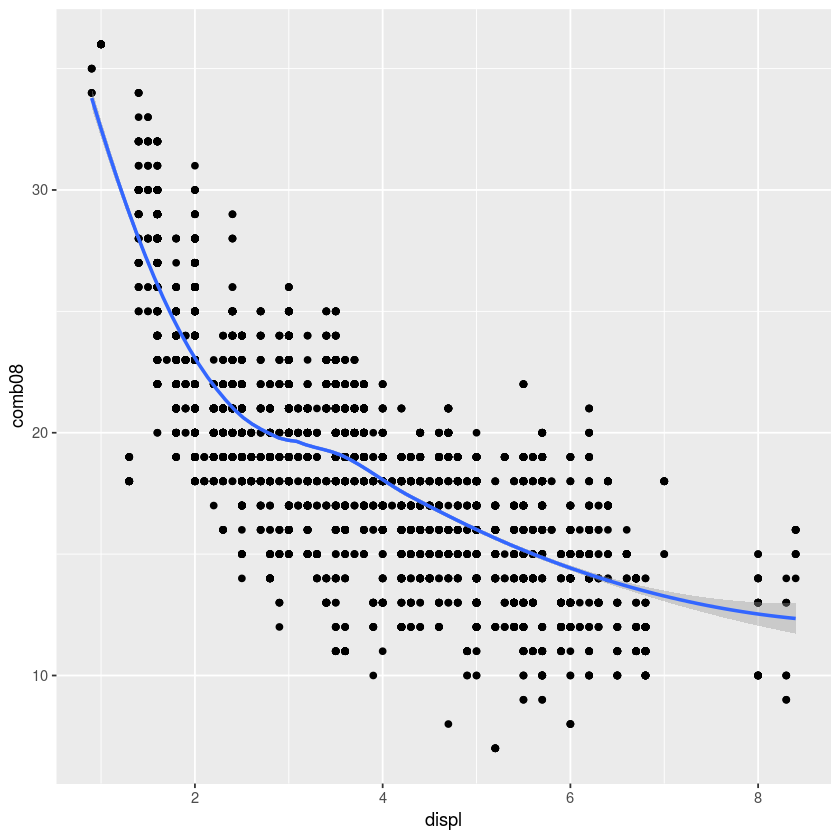

In [108]:
ggplot(gasCars, aes(displ, comb08)) + geom_point() +
  geom_smooth(method = 'loess')

In [110]:
avgCarSize <- ddply(gasCars, ~year, summarise, avgDispl =
                      mean(displ))

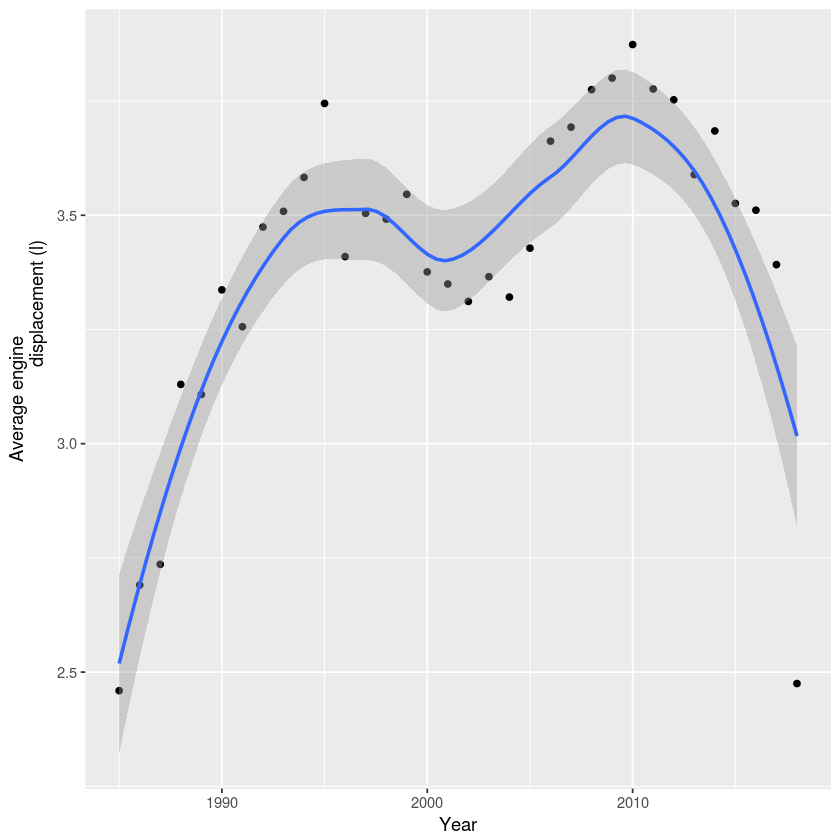

In [113]:
ggplot(avgCarSize, aes(year, avgDispl)) + geom_point() +
  geom_smooth(method = 'loess') + xlab("Year") + ylab("Average engine
                                      displacement (l)")

In [114]:
byYear <- ddply(gasCars, ~year, summarise, avgMPG = mean(comb08), avgDispl = mean(displ))

In [115]:
head(byYear)

year,avgMPG,avgDispl
1985,19.55446,2.459406
1986,18.96000,2.690667
1987,18.85393,2.735955
1988,18.20192,3.129808
1989,17.85211,3.107746
1990,17.44531,3.336719


In [116]:
byYear2 = melt(byYear, id = "year")

In [118]:
levels(byYear2$variable) <- c("Average MPG", "Avg engine displacement")

In [119]:
head(byYear2)

year,variable,value
1985,Average MPG,19.55446
1986,Average MPG,18.96000
1987,Average MPG,18.85393
1988,Average MPG,18.20192
1989,Average MPG,17.85211
1990,Average MPG,17.44531


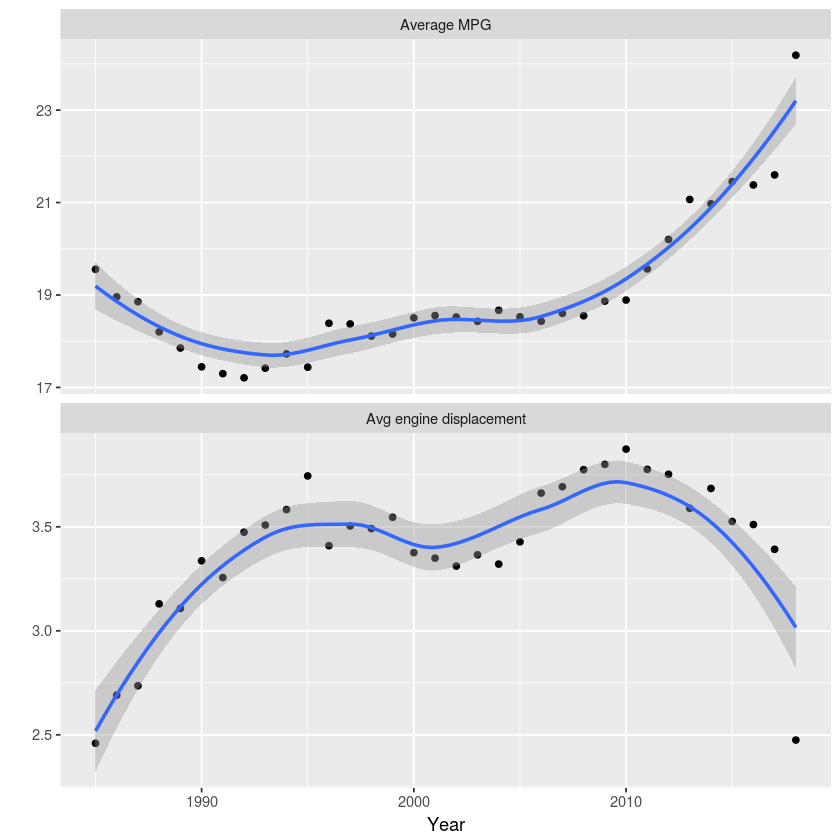

In [122]:
ggplot(byYear2, aes(year, value)) + geom_point() +
  geom_smooth(method = 'loess') + 
  facet_wrap(~variable, ncol = 1, scales ="free_y") + 
  xlab("Year") + ylab("")

From this plot, we can see the following:
* Engine sizes have generally increased until 2010, with a sudden increase in large cars between 2006 and 2008.
* Since 2010, there has been a decrease in the average car size, which partially explains the increase in fuel efficiency.
* Until 2005, there was an increase in the average car size, but the fuel efficiency remained roughly constant. This seems to indicate that engine efficiency has increased over the years.

In [123]:
gasCars4 <- subset(gasCars, cylinders == "4")

Given the trend toward smaller displacement engines, let's see whether automatic
or manual transmissions are more efficient for four cylinder engines, and how the
efficiencies have changed over time:

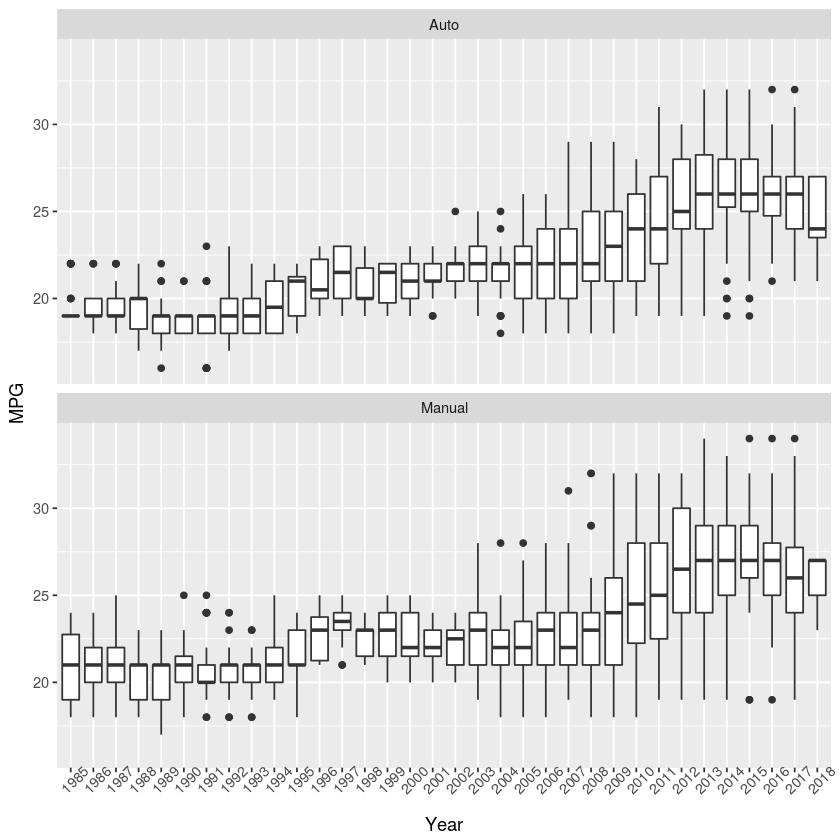

In [126]:
ggplot(gasCars4, aes(factor(year), comb08)) + 
  geom_boxplot()+ facet_wrap(~trany2, ncol = 1) + 
  theme(axis.text.x = element_text(angle = 45)) + 
  labs(x = "Year", y = "MPG")


Next, let's look at the change in proportion of manual cars available each year:

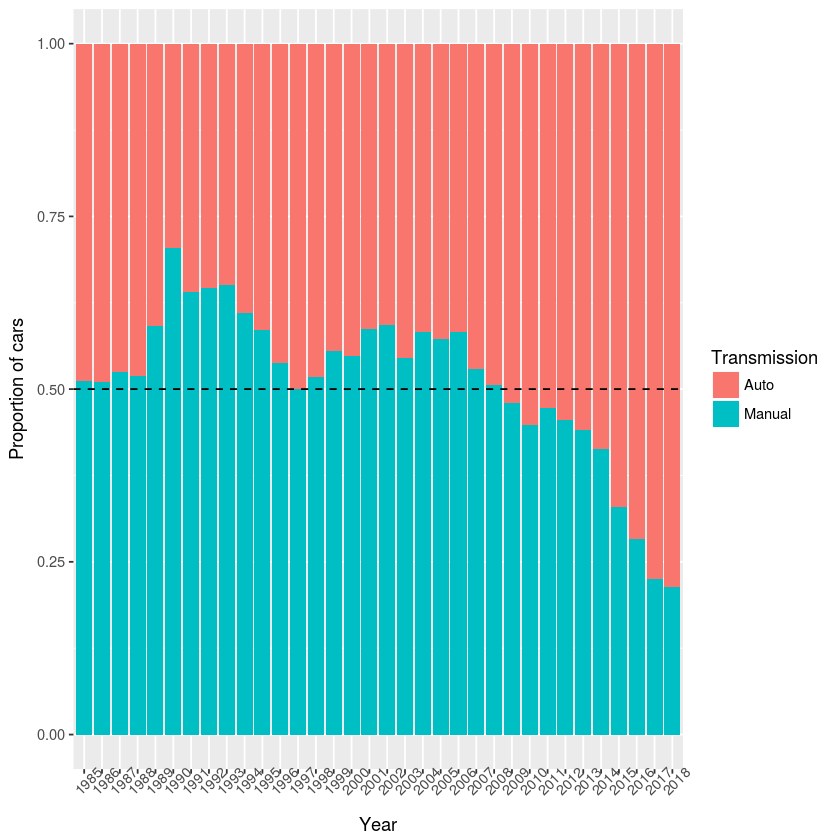

In [134]:
ggplot(gasCars4, aes(x=factor(year), fill = factor(trany2))) +
  geom_bar(position = "fill") + 
  labs(x = "Year", y = "Proportion of cars", fill = "Transmission") + 
  theme(axis.text.x =  element_text(angle = 45)) + 
  geom_hline(yintercept = 0.5,linetype = 2)

### Investigating the makes and models of automobiles

In [150]:
carsMake <- ddply(gasCars4, ~year, summarise, numberOfMakes =
                    length(unique(make)))


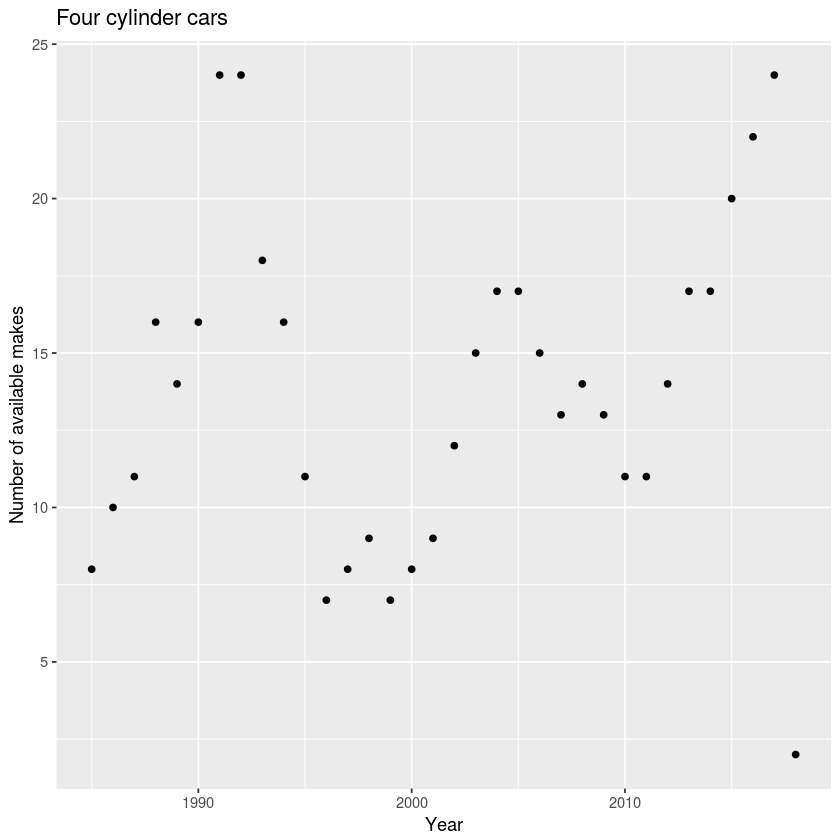

In [151]:
ggplot(carsMake, aes(year, numberOfMakes)) + geom_point() +
  labs(x = "Year", y = "Number of available makes") + 
ggtitle("Four cylinder cars")


In [173]:
uniqMakes <- dlply(subset(gasCars4, year > 2000 & year < 2018), ~year, function(x) unique(x$make))

In [174]:
commonMakes <- Reduce(intersect, uniqMakes)
length(commonMakes)
commonMakes

[1] 4

[1] "Audi"       "Mazda"      "Acura"      "Volkswagen"

In [176]:
carsCommonMakes4 <- subset(gasCars4, make %in% commonMakes)

In [178]:
avgMPG_commonMakes <- ddply(carsCommonMakes4, ~year + make, summarise, avgMPG = mean(comb08))

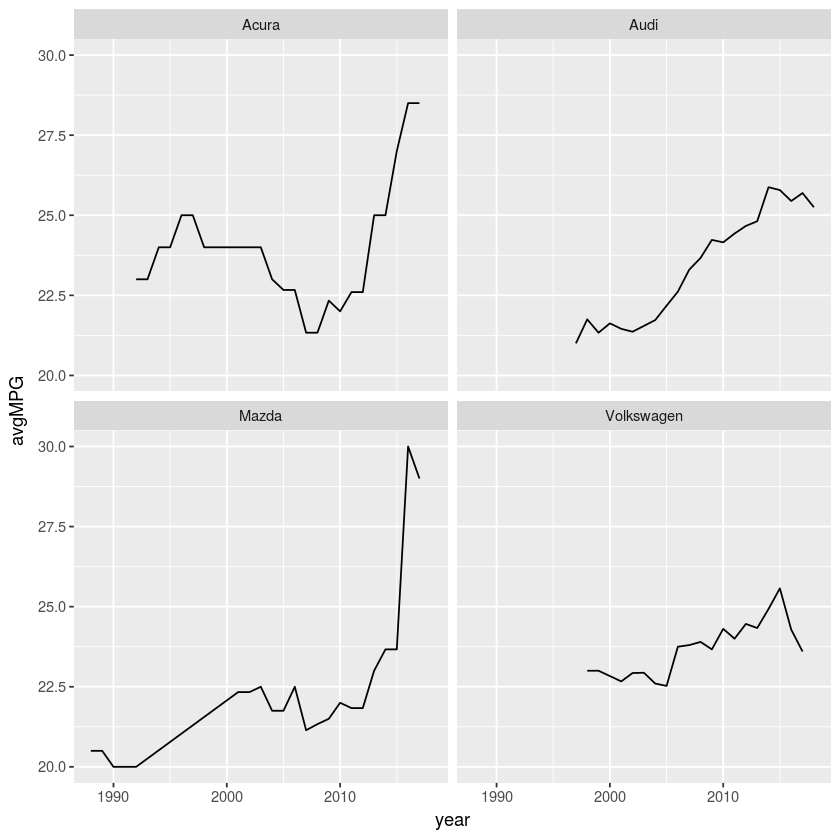

In [179]:
ggplot(avgMPG_commonMakes, aes(year, avgMPG)) + geom_line() + facet_wrap(~make, nrow = 3)